# Prédire le prix d’une maison 🏠

🎯 Dans ce défi, vous allez **prédire le prix de vente** des maisons ('SalePrice') en fonction de la *surface*, du *nombre de chambres* ou de la *qualité globale*.

## Charger des bibliothèques Python

Exécutez la cellule ci-dessous pour `importer` des bibliothèques Python - ce seront nos outils pour travailler avec les données📊


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

--------------

## Charger le jeu de données

👇 Exécutez la cellule ci-dessous pour charger le jeu de données `house_prices.csv` en tant que `DataFrame` avec pandas, et afficher ses 5 premières lignes.

*Remarque : les jeux de données ont été nettoyés à des fins d’apprentissage*

In [2]:
houses = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/house-prices.csv')
houses.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual,SalePrice
0,1710,3,1,7,208500
1,1262,3,1,6,181500
2,1786,3,1,7,223500
3,1717,3,1,7,140000
4,2198,4,1,8,250000


Cet ensemble de données contient des informations sur les maisons vendues.

Les *colonnes* de l’ensemble de données sont les suivantes :

*Features:*
- `GrLivArea`: Surface en mètres carrés
- `BedroomAbvGr`: Nombre de chambres
- `KitchenAbvGr`: Nombre de cuisines
- `OverallQual`: Qualité générale (1 : Très médiocre / 10 : Très excellent)

*Target:*
- `SalePrice`: Prix de vente en USD (dollar)

--------------

## Nous pouvons obtenir beaucoup d’informations sans ML! 🤔

### À vous de jouer ! 🚀

Commençons par **comprendre les données dont nous disposons** - quelle est la taille de l’ensemble de données, quelles sont les informations (colonnes) dont nous disposons, etc.

** 💡 Astuce :** n’oubliez pas de vérifier le TP sur les voitures  pour connaître les bonnes méthodes

In [3]:
len(houses)

1759

In [4]:
houses.shape

(1759, 5)

In [5]:
houses.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual',
       'SalePrice'],
      dtype='object')

Maintenant, essayez de **se séparer de certaines colonnes** - disons que nous voulons seulement voir `SalePrice`, ou `GrLivArea` et `BedroomAbvGr`:

In [6]:
# Afficher uniquement la colonne 'SalePrice'
houses['SalePrice']

# Afficher uniquement les colonnes 'GrLivArea' et 'BedroomAbvGr'
houses[['GrLivArea', 'BedroomAbvGr']]

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4
...,...,...
1754,2073,3
1755,1125,2
1756,1640,3
1757,2229,5


In [7]:
# Afficher les colonnes "Saleprice" et "BedroomAbvGr"
houses[['SalePrice', 'BedroomAbvGr']]

,SalePrice,BedroomAbvGr
0,208500,3
1,181500,3
2,223500,3
3,140000,3
4,250000,4
...,...,...
1754,210000,3
1755,155000,2
1756,173000,3
1757,104000,5


-------

### À vous de jouer - Maintenant, faisons un peu de **visualisation** 📊. 


Suivons une intuition de base - **la surface ('GrLivArea') affecte-t-elle le prix de la maison('SalePrice')❓**

Utilisons un [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - une méthode à l’intérieur de la bibliothèque Seaborn (que nous avons importée ci-dessus et abrégée en `sns`) qui nous donne un graphique avec des points de données sous forme de points avec des valeurs `x` et `y`.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

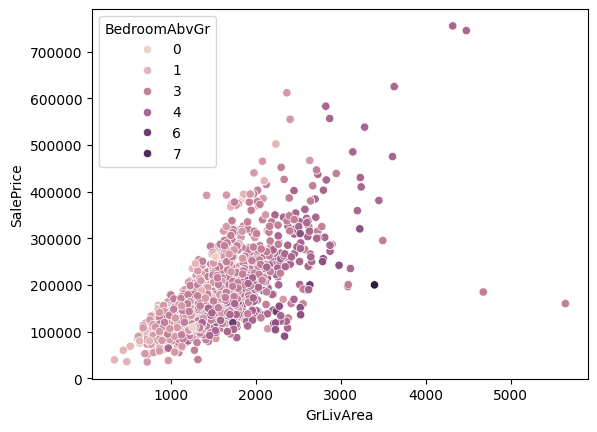

In [8]:
# affichons un scatterpot entre 'GrLivArea' et 'SalePrice'
sns.scatterplot(data=houses, x='GrLivArea', y='SalePrice', hue='BedroomAbvGr')


La qualité globale (`OverallQual`) a-t-elle un impact sur le `SalePrice` ❓ **

**💡Astuce :** Vous pouvez ajouter une `hue` au graphique précédent

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

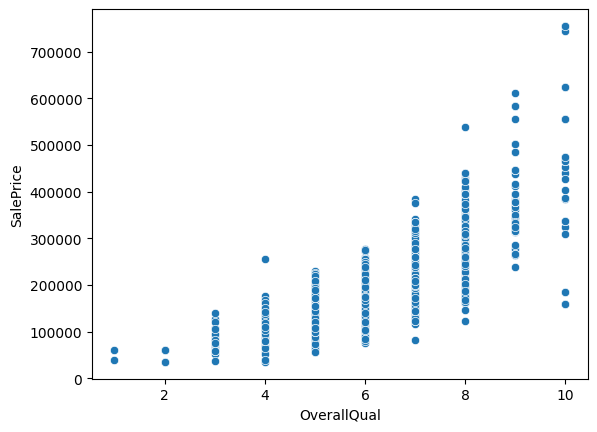

In [9]:
# Affichons un scatterpot entre 'OverallQual' et 'SalePrice' 
sns.scatterplot(data=houses, x='OverallQual', y='SalePrice')

Comprenons également la répartition que nous avons pour certaines fonctionnalités :

- **Quelle est la répartition du nombre de chambres❓**
- **Quelle est la répartition du nombre de cuisines❓**

Seaborn `countplot` est là pour vous aider.

<Axes: xlabel='BedroomAbvGr', ylabel='count'>

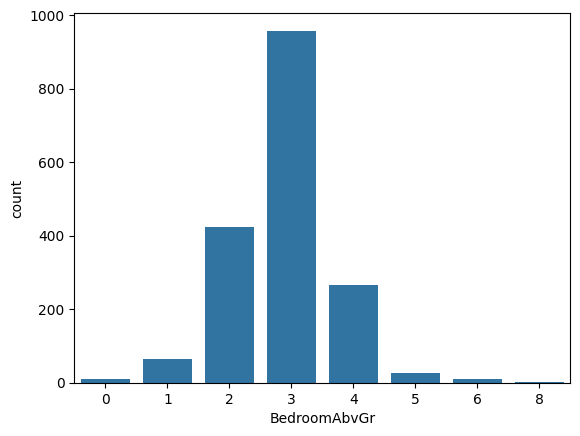

In [10]:
# Afiicher la répartition de nombres de chambres avec countplot
sns.countplot(data=houses, x='BedroomAbvGr')

<Axes: xlabel='KitchenAbvGr', ylabel='count'>

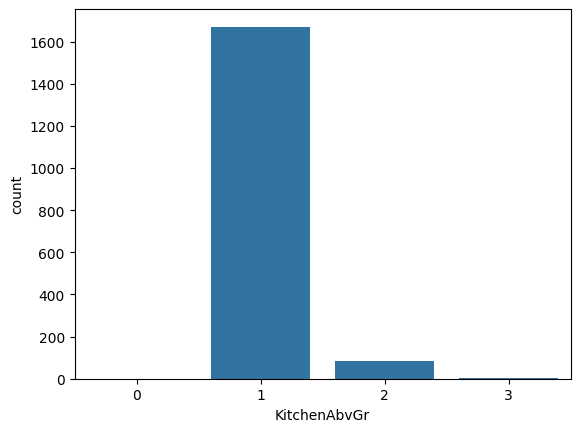

In [11]:
# Afficher la repartition du nombre de cuisines
sns.countplot(data=houses, x='KitchenAbvGr')

--------------

## Modèle - Régression linéaire 📈

**1.** Tout d’abord, créons features et notre target.

Créez une variable `features` contenant toutes les fonctionnalités :

In [12]:
features = houses[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']]

Créez une variable `target` contenant la cible :

In [13]:
target = houses['SalePrice']

N’hésitez pas à vérifier ce qu’il y a dans vos `features` et votre `target` ci-dessous :

In [14]:
features.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual
0,1710,3,1,7
1,1262,3,1,6
2,1786,3,1,7
3,1717,3,1,7
4,2198,4,1,8


In [15]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

--------------

**2.** Il est temps d'**importer** la fonction *sklearn* pour diviser notre jeu de données en un train et au test set

Essayez de trouver la bonne fonction [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [16]:
from sklearn.model_selection import train_test_split

--------------

**3.** Utilisez cette fonction pour créer **X_train, X_test, y_train, y_test**

🚨 Poser `random_state=42` en tant qu’argument de la fonction.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Vérifiez ce qu’il y a dans les `X_train`, `X_test`, `y_train`, `y_test`:

- Quel pourcentage des observations a été alloué au train et au test ?
- Combien y a-t-il de dimension dans `X_train` et `X_test`

In [18]:
# Calcul du pourcentage d'observations allouées au train et au test
train_pct = len(X_train) / len(houses) * 100
test_pct = len(X_test) / len(houses) * 100
print(f"Train: {train_pct:.1f}%")
print(f"Test: {test_pct:.1f}%")

Train: 80.0%
Test: 20.0%


--------------

**4.** Temps nécessaire pour **importer** le modèle de régression linéaire

Les bibliothèques Python comme [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) permettent aux personnes qui se lancent dans la science des données et le ML d’expérimenter très facilement.

Le code est déjà dans la bibliothèque, il s’agit juste **d’appeler les bonnes méthodes !** 🛠

In [19]:
from sklearn.linear_model import LinearRegression

Maintenant, pour **initialiser** le modèle. Stockez-le dans une variable `model`:

In [20]:
model = LinearRegression()

--------------

**5. Train** le modèle sur le **training set**. 

Il s’agit du processus par lequel le modèle de régression linéaire recherche la ligne qui correspond le mieux à tous les points du jeu de données. C’est la partie où l’ordinateur est à fond en train d’apprendre ! 🤖

In [21]:
model.fit(X_train, y_train)

LinearRegression()

--------------

**6. Évaluer** les performances du modèle sur le **test set**.

Les modèles peuvent avoir différentes mesures de notation par défaut. Par défaut, la régression linéaire utilise ce que l’on appelle le `R-squared`, une métrique qui indique dans quelle mesure la variation de la cible (`SalePrice`) peut être expliquée par les modifications apportées aux caractéristiques (`GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr` and `OverallQual`)

In [22]:
test_score = model.score(X_test, y_test)
test_score

0.6818097180525868

⚠️ **Attention à ne pas confondre cela avec l’accuracy**. Le nombre ci-dessus montre que **"les entrées dont nous disposons peuvent nous aider à prédire ce pourcentage de variation de la dépréciation"** Ce qui est décent étant donné que nous l’avons fait avec seulement quelques lignes de code ! 

Comparons ce score à celui obtenu par le modèle sur le **training set**:

In [23]:
# comparons ce score à celui obtenu par le modèle sur le training set
train_score = model.score(X_train, y_train)
train_score

0.725197073168302

👉 Vous devriez obtenir un score légèrement plus élevé sur l’ensemble d’entraînement, ce qui est normal en général.

La bonne nouvelle, c’est que les 2 scores sont relativement proches l’un de l’autre, ce qui montre que nous avons atteint un **bon équilibre**, notre modèle **généralise bien aux nouvelles observations**, expliquant plus de 70% de la variation de la dépréciation.

**Le fractionnement du jeu de données en un ensemble d’apprentissage et un ensemble de test est essentiel dans le Machine Learning**. Il nous permet d’identifier :
- **Surapprentissage** : on verrait une grande différence entre les 2 scores. Le modèle serait très bon sur les données sur lesquelles il s’est entraîné, mais serait mauvais sur l’ensemble de test.
- **Sous-ajustement** : nous aurions un mauvais score à la fois sur les données d’entraînement et sur les données de test. Dans ce cas, cela pourrait s’expliquer par le fait que le modèle n’est pas assez complexe pour capturer les modèles dans les données.

Dans notre cas, nous avons un **modèle robuste** qui fonctionne bien sur de nouvelles observations💪. Nous pouvons maintenant l’utiliser pour faire des prédictions sur les nouvelles maisons en toute confiance.

--------------

**7.** Prédisons le prix d’une maison 🔮 neuve

Cette nouvelle maison présente les caractéristiques suivantes :
- **Surface** de 3 000 pieds carrés
- 3 **bedrooms**
- 1 **kitchen**
- **Overall quality** score de 5

**7.1** Commencez par créer la variable `new_house` dans laquelle vous stockerez ces caractéristiques. Assurez-vous d’utiliser le bon format pour pouvoir faire une prédiction.

*Note : voici un rappel des colonnes du tableau :* `['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']`

In [24]:
# Caractéristiques de la nouvelle maison : [GrLivArea, BedroomAbvGr, KitchenAbvGr, OverallQual]
new_house = [[3000, 3, 1, 5]]


<details>
    <summary>💡Indice</summary>
<p> 
<pre>
`new_house` should be a `list of list`:
    [[surface, nb_bedrooms, nb_kitchens, overall_quality]]
</pre>
</details>

**7.2** Utilisez maintenant la bonne méthode pour faire une prédiction à l’aide du modèle que nous venons d’entraîner:

In [25]:
model.predict(new_house)

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([253355.61741514])

Supposons maintenant que nous ayons une autre maison avec les mêmes caractéristiques, à l’exception du score de qualité global de 9. 

**Quel serait le prix de cette maison❓**

In [26]:
new_house_high_quality = [[3000, 3, 1, 9]]
model.predict(new_house_high_quality)

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([374281.98623471])

--------------

**8.** **Explication** du modèle

La régression linéaire est un [linear model](https://scikit-learn.org/stable/modules/linear_model.html), Son explicabilité est donc assez élevée.

**8.1.** Nous pouvons vérifier le `coef_` ou les **coefficients** du modèle. Ceux-ci expliquent dans quelle mesure la cible (`SalePrice`) change avec une variation de `1` dans chacune des caractéristiques (inputs), tout en maintenant les autres caractéristiques constantes.

In [27]:
# explication du modèle regression linéaire
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})
print(coefficients)

        Feature   Coefficient
0     GrLivArea     71.370929
1  BedroomAbvGr -12762.257076
2  KitchenAbvGr -21829.747213
3   OverallQual  30231.592205


🤔 Nous aurions besoin de vérifier à nouveau l’ordre des colonnes, pour savoir quel nombre est quel input. Mais, **nous avons ce qu’il vous faut !** Exécutez la cellule ci-dessous :

In [28]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,GrLivArea,71.370929
1,BedroomAbvGr,-12762.257076
2,KitchenAbvGr,-21829.747213
3,OverallQual,30231.592205


**8.2** L’autre chose que nous pouvons vérifier est l'**intercept** du modèle. Il s’agit de la cible (`SalePrice`) lorsque toutes les entrées sont égales à 0. Cela devrait donc être proche d’une maison neuve avec une surface de 0 pieds carrés, pas de chambres, pas de cuisines et une qualité globale de 0 :

In [29]:
# Afficher l'intercept du modèle de régression linéaire
model.intercept_

-51798.61351481461